# Random Forest Klassifikator mit Sklearn 

von Eric Hirsch und Jonas Morsch 

### Einbinden alle benötigten Bibilotheken 


In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import random

import Data_preparation as DP 
DP=DP.Data_preparation()

### Laden des Datensatzes 

In [14]:
df = DP.load_csv_to_df("ricsData_big_v5.csv")
print(df.columns)# Anzeigen aller features und Labels 

Index(['Rel_BreitGross', 'RelSpitze_oben', 'RelSpitze_unten', 'Anzahl_Linie',
       'Anzahl_Ecken', 'Anzahl_Kreis', 'innere_Konturen', 'Label'],
      dtype='object')


In [15]:
# Merkamle welche für die Klassifizierung benutzt werden sollen auswählen 
df=df[["Rel_BreitGross","RelSpitze_oben","RelSpitze_unten","Anzahl_Linie","Label"]]
X_train,X_test,y_train,y_test=DP.split_data(df,0.7)# Aufteilen der Daten in Trainings und Testdaten 
df.head()

training set size: 564 samples 
test set size: 241 samples


,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Label
0,0.288606,0.074919,0.618893,6,0
1,0.494050,0.685185,0.634259,5,0
2,0.497540,0.986384,0.989410,15,0
3,0.480687,0.714286,0.592262,21,0
4,0.322937,0.159763,0.633136,21,0


### Erstellen des Random Forest Klasifikators 

In [18]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train.values,y_train.values.ravel())


RandomForestClassifier()

In [20]:
y_pred=clf.predict(X_test.values)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6639004149377593


### Ausgabe der Metrics 

              precision    recall  f1-score   support

           0       0.60      0.61      0.61        67
           1       0.70      0.76      0.73        87
           2       0.67      0.61      0.64        87

    accuracy                           0.66       241
   macro avg       0.66      0.66      0.66       241
weighted avg       0.66      0.66      0.66       241

Confusion matrix
[[41 13 13]
 [ 8 66 13]
 [19 15 53]]


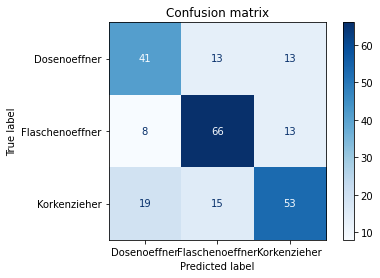

In [27]:
print(metrics.classification_report(y_test,y_pred))
np.set_printoptions(precision=2) # nur zwei nachkoma Stellen anzeigen 
class_names=["Dosenoeffner","Flaschenoeffner","Korkenzieher"]# Namen der Klassen 

### erzeugen einer Konfusionsmatrix
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test.values,
    y_test.values,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

print("Confusion matrix")
print(disp.confusion_matrix)



In [21]:
predict= X_test.iloc[10]
predict


Rel_BreitGross      0.369441
RelSpitze_oben      0.924699
RelSpitze_unten     0.682229
Anzahl_Linie       17.000000
Name: 25, dtype: float64

In [22]:
print(clf.predict([predict]))
print(y_test.iloc[10])

[0]
Label    0
Name: 25, dtype: int64


### Ein einzelnes Bild vorhersagen


In [29]:
random_index=random.randint(0,len(X_test)) # ein Index im Bereich 0 länge der Testdaten wählen 
prediction=clf.predict(X_test.values[random_index].reshape(1,-1))# ein zufälligesd Bild Vorhersagen 
print("Class predictet by Naive Bayes: {}".format(prediction))
print("actual Class: {} ".format(y_test.iloc[random_index,:]))

Class predictet by Naive Bayes: [1]
actual Class: Label    1
Name: 408, dtype: int64 
